In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 高级处理-交叉表与透视表

## 数据准备

In [2]:
data = pd.read_csv("../data/stock_day.csv")
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


### index转化为日期

In [3]:
# 寻找星期几跟股票张得的关系
# 1、先把对应的日期找到星期几
date = pd.to_datetime(data.index)
date

DatetimeIndex(['2018-02-27', '2018-02-26', '2018-02-23', '2018-02-22',
               '2018-02-14', '2018-02-13', '2018-02-12', '2018-02-09',
               '2018-02-08', '2018-02-07',
               ...
               '2015-03-13', '2015-03-12', '2015-03-11', '2015-03-10',
               '2015-03-09', '2015-03-06', '2015-03-05', '2015-03-04',
               '2015-03-03', '2015-03-02'],
              dtype='datetime64[ns]', length=643, freq=None)

In [5]:
weekday = date.weekday
weekday

Int64Index([1, 0, 4, 3, 2, 1, 0, 4, 3, 2,
            ...
            4, 3, 2, 1, 0, 4, 3, 2, 1, 0],
           dtype='int64', length=643)

### 添加星期

In [6]:
data["weekday"] = weekday
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,weekday
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2


### 添加涨跌

In [7]:
# 把p_change按照大小去分个类0为界限 0代表跌,1代表涨
data["posi_neg"] = np.where(data["p_change"]>0, 1, 0)
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,weekday,posi_neg
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0,1
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4,1
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3,1
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2,1


# 通过crosstab交叉表找寻两列数据的关系

In [9]:
count = pd.crosstab(data["weekday"], data["posi_neg"])
count

posi_neg,0,1
weekday,,
0,63,62
1,55,76
2,61,71
3,63,65
4,59,68


In [10]:
# 对于每个星期总天数求和，运用除法运算求出比例
# 算数运算，先求和(行)
sum = count.sum(axis=1).astype(np.float32)
sum

weekday
0    125.0
1    131.0
2    132.0
3    128.0
4    127.0
dtype: float32

In [11]:
# 每行相除
div = count.div(sum, axis=0)
div

posi_neg,0,1
weekday,,
0,0.504000,0.496000
1,0.419847,0.580153
2,0.462121,0.537879
3,0.492188,0.507812
4,0.464567,0.535433


## 查看效果

<AxesSubplot: xlabel='weekday'>

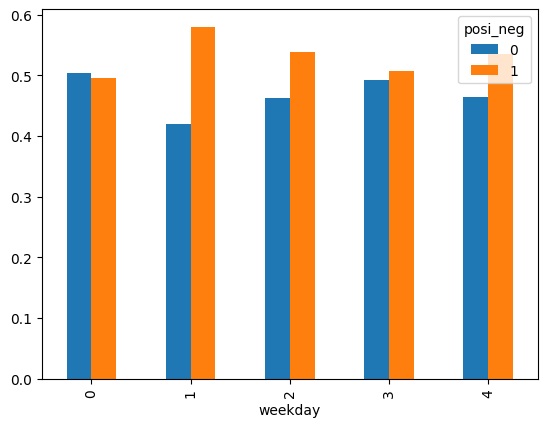

In [12]:
div.plot(kind="bar")

<AxesSubplot: xlabel='weekday'>

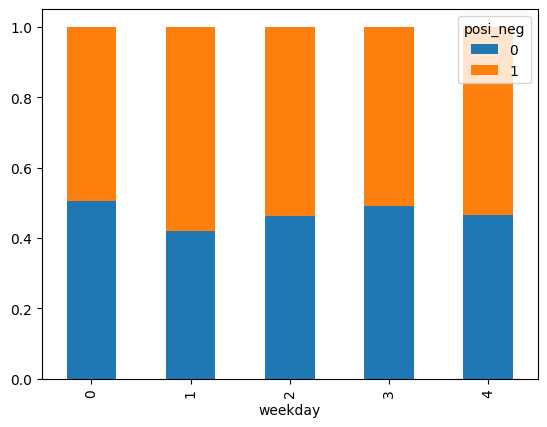

In [13]:
div.plot(kind="bar", stacked=True)

# pivot_table(透视表)

In [14]:
# 通过透视表，将整个过程变成更简单一些(不用求百分占比)
res = data.pivot_table(["posi_neg"], index="weekday")
res

,posi_neg
weekday,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433


<AxesSubplot: xlabel='weekday'>

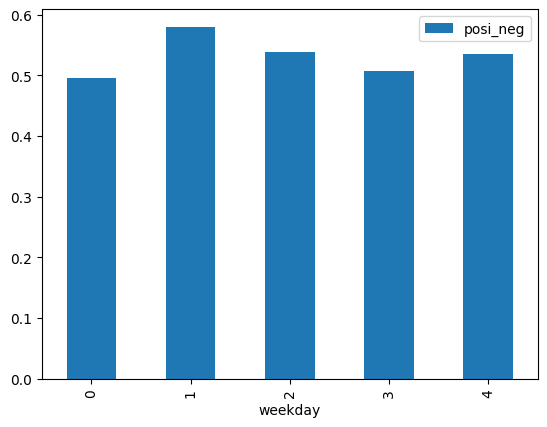

In [15]:
res.plot(kind="bar")